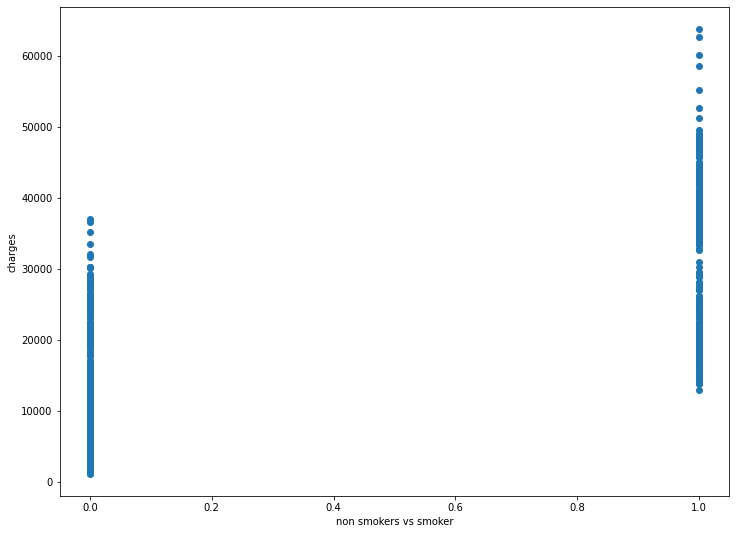

In [33]:
#Importing the basic libraries that will be required throught the project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("insurance.csv")

df.head(10)
df.dtypes

tem=pd.get_dummies(df["region"])
tem.head(10)
df.drop("region",axis=1,inplace=True)
df.head(10)
map={"yes":1,"no":0}
df["smoker"] = df["smoker"].map(map)
map1 = {"female":0,"male":1}
df["sex"]=df["sex"].map(map1)
df.head(10)
# combinig both data frames
df=pd.concat([df,tem],axis=1)
df.head(10)
#covering categorical variables to numeric
x = df["smoker"]
y = df["charges"]
plt.figure(figsize=(12,9))
plt.scatter(x,y)
plt.xlabel("non smokers vs smoker")
plt.ylabel('charges')
Y = df["charges"]
X = df.drop("charges",axis=1)
X
Y

from pandas.core.common import random_state
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=1,test_size=0.15)



In [35]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression().fit(x_train,y_train)
y_pred=reg.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.7444438290908182

In [36]:
# storing independent features in a temprorary variable
P_X=X

In [42]:
from sklearn.preprocessing import PolynomialFeatures
pol=PolynomialFeatures(degree=3)
P_X=pol.fit_transform(X)
P_X

array([[ 1., 19.,  0., ...,  0.,  0.,  1.],
       [ 1., 18.,  1., ...,  0.,  0.,  0.],
       [ 1., 28.,  1., ...,  0.,  0.,  0.],
       ...,
       [ 1., 18.,  0., ...,  0.,  0.,  0.],
       [ 1., 21.,  0., ...,  0.,  0.,  1.],
       [ 1., 61.,  0., ...,  0.,  0.,  0.]])

In [45]:
#cross validating the model similarly but 3rd  degree polynomial of x this time
x_train,x_test,y_train,y_test=train_test_split(P_X,Y,random_state=1,test_size=0.15)
reg=LinearRegression().fit(x_train,y_train)
y_pred=reg.predict(x_test)

In [46]:
r2_score(y_test,y_pred)

0.8421061240324161

In [55]:
# cross validating the score to check and avoid overfitting
from sklearn.model_selection import cross_val_score
c=cross_val_score(reg,P_X,Y,cv=4)
c

array([0.84846302, 0.79022141, 0.85205271, 0.81596221])

In [57]:
# Final Mean Accuracy
print("Mean accuracy after cross validation is",c.mean()*100,end="%")

Mean accuracy after cross validation is 82.66748374844386%

it is clearly visiable that smookers have  high medical costs(1300-60000+) when compared to non smoker(0-38000)
